<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [13]:
import pandas as pd
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [25]:
from keras.datasets import boston_housing

(boston_x_train, boston_y_train), (boston_x_test, boston_y_test) = boston_housing.load_data()
#print(boston_x_train.shape)


def baseline_model():
        # Create model
        model = Sequential()
        model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal'))
        # Compile model
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0))
])

kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, boston_x_train, boston_y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))



(404, 13)
(404,)
Standardized: -59.00 (33.61) MSE


In [22]:

# define the model
def larger_model():
        # Create model
        model = Sequential()
        model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
        model.add(Dense(6, kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal'))
        # Compile model
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
    
pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', KerasRegressor(build_fn=larger_model, epochs=10, batch_size=5, verbose=0))
])

results2 = cross_val_score(pipeline2, boston_x_train, boston_y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results2.mean(), results2.std()))

Standardized: -31.98 (18.38) MSE


In [23]:
def wider_model():
        # create model
        model = Sequential()
        model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal'))
        # Compile model
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model
    
pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', KerasRegressor(build_fn=wider_model, epochs=10, batch_size=5, verbose=0))
])

results3 = cross_val_score(pipeline3, boston_x_train, boston_y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results3.mean(), results3.std()))

Standardized: -45.91 (27.26) MSE


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [8]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(123, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
fitted = model.fit(x=x_train, y=y_train, validation_split=0.25, epochs=10)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 19s 431us/step - loss: 0.2383 - accuracy: 0.9286 - val_loss: 0.1117 - val_accuracy: 0.9669
Epoch 2/10
45000/45000 [==============================] - 20s 451us/step - loss: 0.0961 - accuracy: 0.9706 - val_loss: 0.0768 - val_accuracy: 0.9763
Epoch 3/10
45000/45000 [==============================] - 21s 465us/step - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.0735 - val_accuracy: 0.9774
Epoch 4/10
45000/45000 [==============================] - 21s 468us/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0657 - val_accuracy: 0.9801
Epoch 5/10
45000/45000 [==============================] - 21s 472us/step - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.0704 - val_accuracy: 0.9813
Epoch 6/10
45000/45000 [==============================] - 22s 483us/step - loss: 0.0332 - accuracy: 0.9889 - val_loss: 0.0690 - val_accuracy: 0.9824
Epoch 7/10
45000/45000 [==============================] 

{'val_loss': [0.11166034662077824, 0.07684792409427464, 0.07350242418274283, 0.06565250193484438, 0.07039050953718834, 0.06901239204648882, 0.07305639990863468, 0.07285829382844822, 0.07595756794283201, 0.08037530310884371], 'val_accuracy': [0.966866672039032, 0.9762666821479797, 0.977400004863739, 0.9801333546638489, 0.981333315372467, 0.9824000000953674, 0.9814000129699707, 0.9833333492279053, 0.9818666577339172, 0.9829999804496765], 'loss': [0.23829147859811783, 0.096144923778375, 0.06556969604864717, 0.05063304536934528, 0.03886089789828079, 0.03323127315740825, 0.027627470567530125, 0.022523323484199744, 0.021714254678251586, 0.017478325408163558], 'accuracy': [0.92855555, 0.97062224, 0.9793778, 0.98417777, 0.9870667, 0.98888886, 0.9904889, 0.9925111, 0.99288887, 0.9937556]}


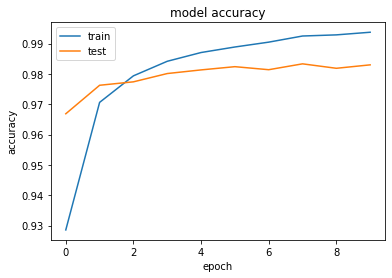

In [10]:
import matplotlib.pyplot as plt
import numpy

print(fitted.history)

plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

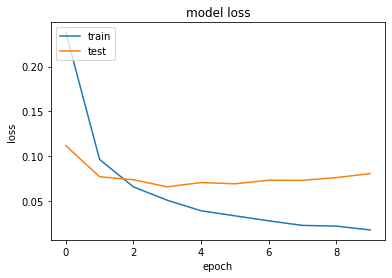

In [11]:
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.